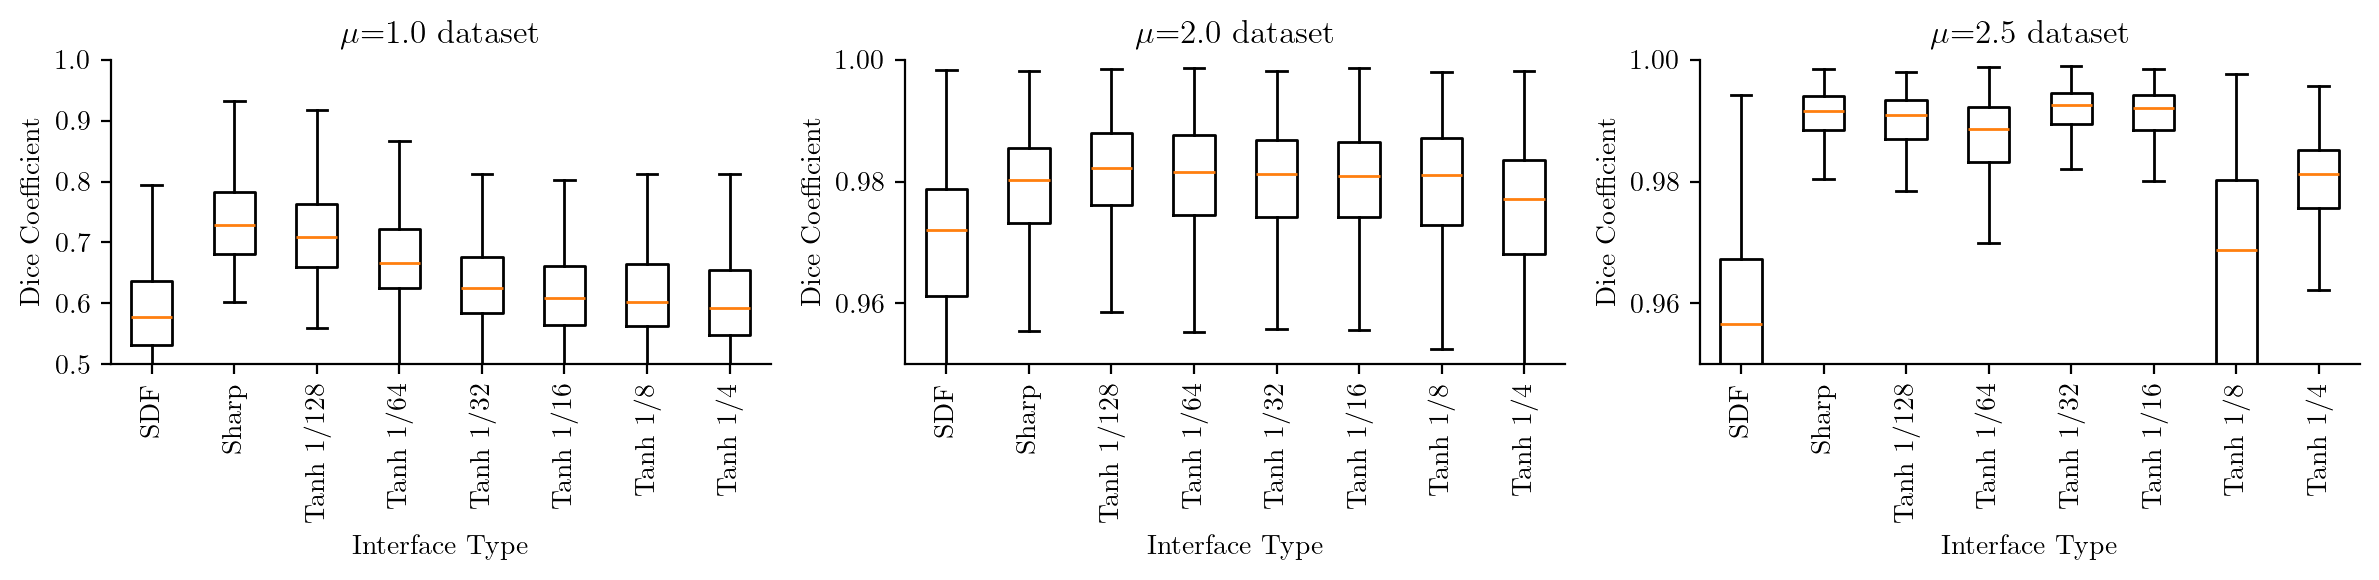

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from fractions import Fraction
import matplotlib

matplotlib.rc_file_defaults()

from src.interface_representation.interface_types import InterfaceType


def create_dice_error_box_plots_mu(df, ylims=[(0.5, 1), (0.95, 1), (0.95, 1)]):
    """
    Create box plots comparing different interface types across mu values.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing columns: 'mu', 'interface_type', 'epsilon', 'Dice'
    ylims : list of tuples
        List of (ymin, ymax) tuples for each subplot

    Returns:
    --------
    fig : matplotlib.figure.Figure
        The created figure object
    """

    def float_to_fraction(float_num):
        fraction = Fraction(float_num).limit_denominator()
        return f"{fraction.numerator}/{fraction.denominator}"

    # Get unique mu values
    mus = sorted(df['mu'].unique())

    # Create dictionary to store data grouped by mu
    mu_to_data = {mu: {} for mu in mus}

    # Process each row in the DataFrame
    for _, row in df.iterrows():
        mu = row['mu']
        interface_type = row['interface_type']
        epsilon = row['epsilon']
        dice_score = row['dice']

        # Create label based on interface type
        if interface_type == InterfaceType.TANH_EPSILON.name:
            label = f'Tanh {epsilon}'
        elif interface_type == InterfaceType.SIGNED_DISTANCE_EXACT.name:
            label = 'SDF'
        elif interface_type == InterfaceType.SIGNED_DISTANCE_APPROXIMATE.name:
            label = 'SDF approx'
        elif interface_type == InterfaceType.HEAVISIDE.name:
            label = 'Sharp'
        else:
            raise ValueError(f"Unknown interface type: {interface_type}")

        if label not in mu_to_data[mu]:
            mu_to_data[mu][label] = []
        mu_to_data[mu][label].append(dice_score)

    # Sort and process labels
    for mu in mu_to_data:
        # Sort by interface type
        mu_to_data[mu] = dict(sorted(mu_to_data[mu].items()))

        # Convert epsilon values to fractions in labels
        new_data = {}
        for k, v in mu_to_data[mu].items():
            if k.startswith('Tanh'):
                epsilon = float(k.split(' ')[1])
                new_data[f'Tanh {float_to_fraction(epsilon)}'] = v
            else:
                new_data[k] = v
        mu_to_data[mu] = new_data

    # Create plots
    fig, axs = plt.subplots(1, len(mus), figsize=(12, 3), dpi=200)

    for i, mu in enumerate(mus):
        data = [mu_to_data[mu][label] for label in mu_to_data[mu]]
        labels = list(mu_to_data[mu].keys())

        axs[i].boxplot(data, tick_labels=labels, showfliers=False)
        axs[i].set_title(f'$\\mu$={mu} dataset')
        axs[i].set_xlabel('Interface Type')
        axs[i].set_ylabel('Dice Coefficient')
        axs[i].spines['top'].set_visible(False)
        axs[i].spines['right'].set_visible(False)
        axs[i].tick_params(axis='x', rotation=90)

        if i < len(ylims):
            axs[i].set_ylim(*ylims[i])

    plt.tight_layout()
    plt.savefig('output/comparison_dice_synthetic.pdf')
    plt.show()


df = pd.read_csv('output/evaluation_results_v35.csv')
create_dice_error_box_plots_mu(df)

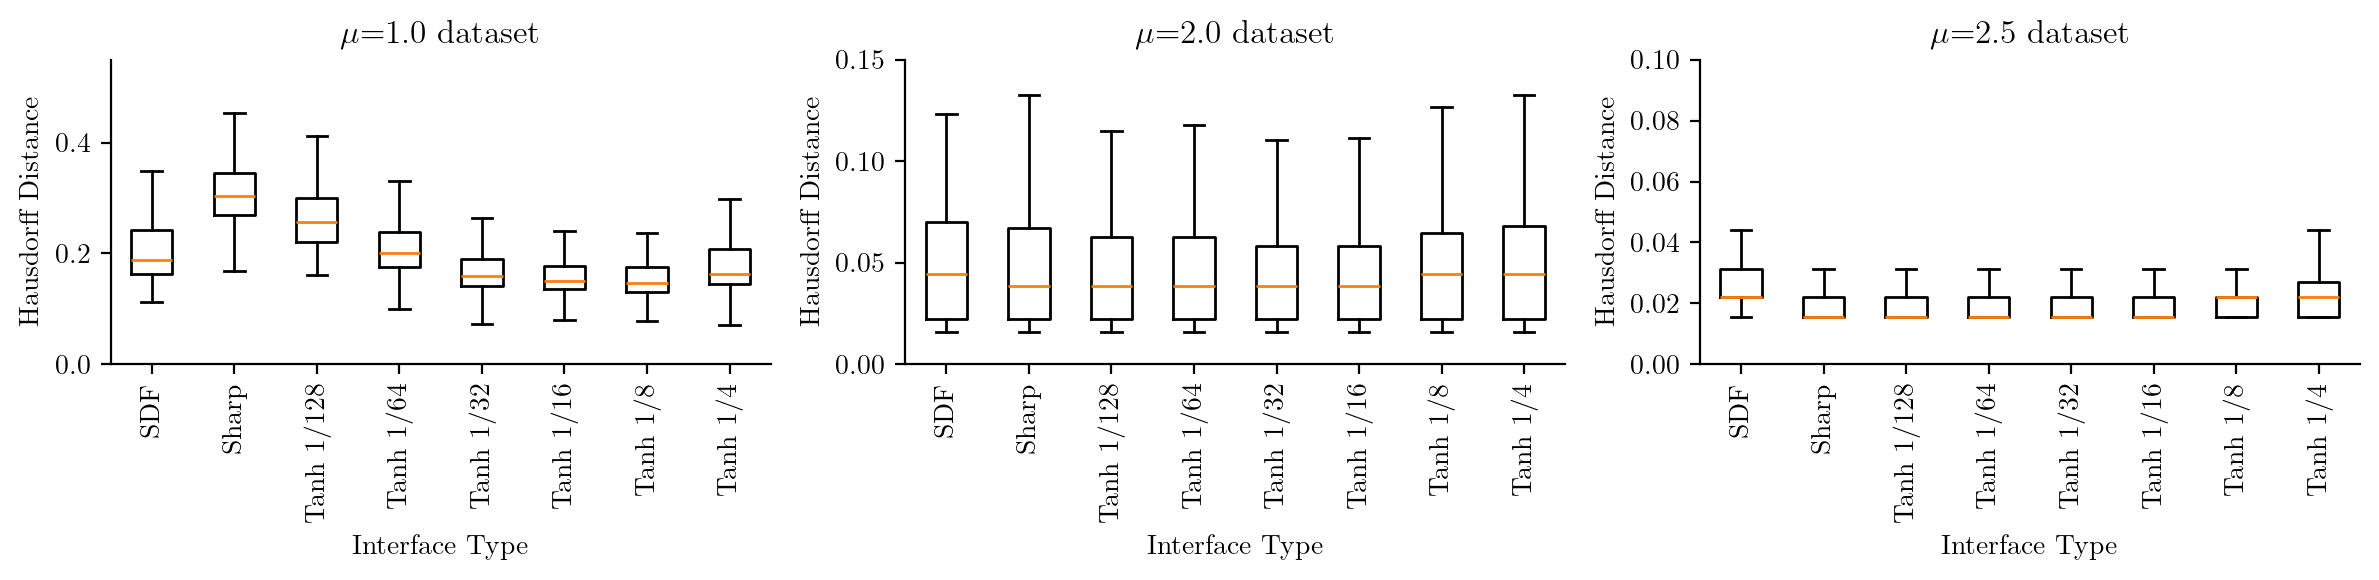

In [9]:
def create_hausdorff_error_box_plots_mu(df, ylims=[(0, 0.55), (0, 0.15), (0, 0.1)]):
    """
    Create box plots comparing different interface types across mu values using Hausdorff distance.
    Units of voxels.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing columns: 'mu', 'interface_type', 'epsilon', 'hausdorff'
    ylims : list of tuples
        List of (ymin, ymax) tuples for each subplot

    Returns:
    --------
    fig : matplotlib.figure.Figure
        The created figure object
    """

    def float_to_fraction(float_num):
        fraction = Fraction(float_num).limit_denominator()
        return f"{fraction.numerator}/{fraction.denominator}"

    # Get unique mu values
    mus = sorted(df['mu'].unique())

    # Create dictionary to store data grouped by mu
    mu_to_data = {mu: {} for mu in mus}

    # Process each row in the DataFrame
    for _, row in df.iterrows():
        mu = row['mu']
        interface_type = row['interface_type']
        epsilon = row['epsilon']
        hausdorff_dist = row['hausdorff']

        # Create label based on interface type
        if interface_type == InterfaceType.TANH_EPSILON.name:
            label = f'Tanh {epsilon}'
        elif interface_type == InterfaceType.SIGNED_DISTANCE_EXACT.name:
            label = 'SDF'
        elif interface_type == InterfaceType.SIGNED_DISTANCE_APPROXIMATE.name:
            label = 'SDF approx'
        elif interface_type == InterfaceType.HEAVISIDE.name:
            label = 'Sharp'
        else:
            raise ValueError(f"Unknown interface type: {interface_type}")

        if label not in mu_to_data[mu]:
            mu_to_data[mu][label] = []

        if not np.isnan(hausdorff_dist):
            mu_to_data[mu][label].append(hausdorff_dist / 64)  # Normalisation

    # Sort and process labels
    for mu in mu_to_data:
        # Sort by interface type
        mu_to_data[mu] = dict(sorted(mu_to_data[mu].items()))

        # Convert epsilon values to fractions in labels
        new_data = {}
        for k, v in mu_to_data[mu].items():
            if k.startswith('Tanh'):
                epsilon = float(k.split(' ')[1])
                new_data[f'Tanh {float_to_fraction(epsilon)}'] = v
            else:
                new_data[k] = v
        mu_to_data[mu] = new_data

    # Create plots
    fig, axs = plt.subplots(1, len(mus), figsize=(12, 3), dpi=200)

    for i, mu in enumerate(mus):
        data = [mu_to_data[mu][label] for label in mu_to_data[mu]]
        labels = list(mu_to_data[mu].keys())

        axs[i].boxplot(data, tick_labels=labels, showfliers=False)
        axs[i].set_title(f'$\\mu$={mu} dataset')
        axs[i].set_xlabel('Interface Type')
        axs[i].set_ylabel('Hausdorff Distance')
        axs[i].spines['top'].set_visible(False)
        axs[i].spines['right'].set_visible(False)
        axs[i].tick_params(axis='x', rotation=90)

        if i < len(ylims):
            axs[i].set_ylim(*ylims[i])

    plt.tight_layout()
    plt.savefig('output/comparison_synthetic_hausdorff.pdf')
    plt.show()


df = pd.read_csv('output/evaluation_results_v35.csv')
create_hausdorff_error_box_plots_mu(df)

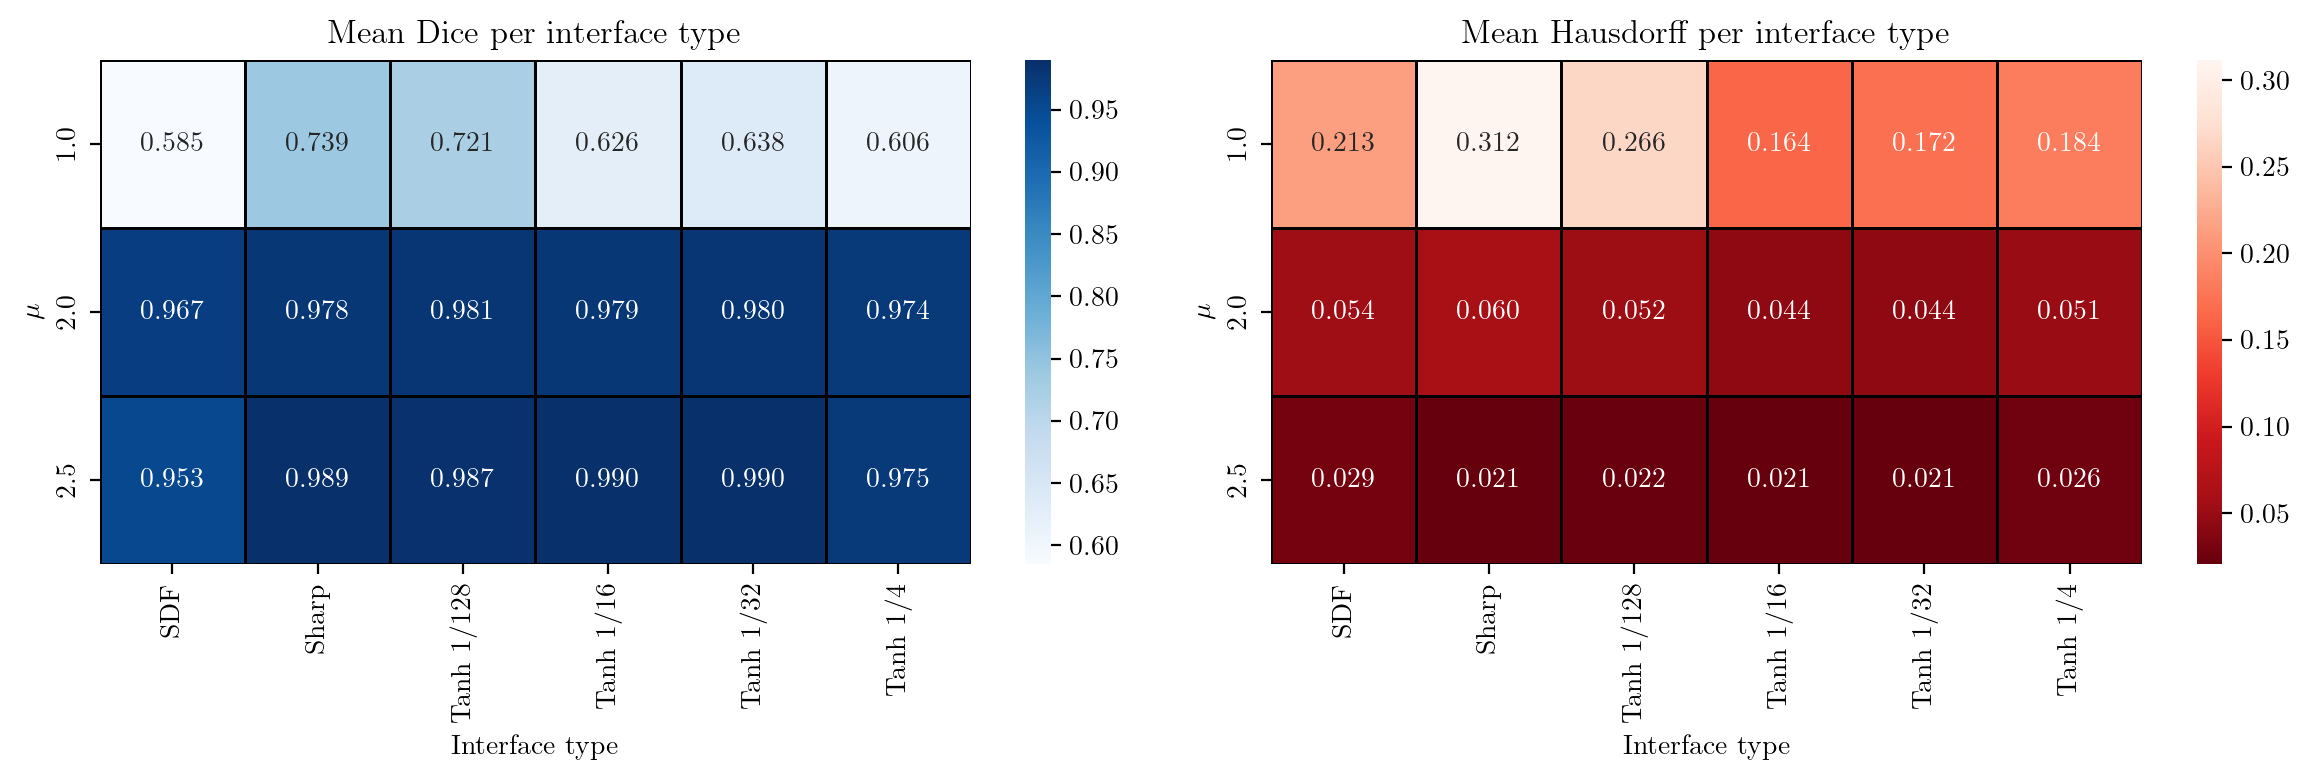

In [10]:
import seaborn as sns

def float_to_fraction(float_num):
    fraction = Fraction(float_num).limit_denominator()
    return f"{fraction.numerator}/{fraction.denominator}"

def label_from_row(row):
    interface_type = row['interface_type']
    epsilon = row['epsilon']
    if interface_type == InterfaceType.TANH_EPSILON.name:
        return f"Tanh {float_to_fraction(epsilon)}"
    elif interface_type == InterfaceType.SIGNED_DISTANCE_EXACT.name:
        return 'SDF'
    elif interface_type == InterfaceType.SIGNED_DISTANCE_APPROXIMATE.name:
        return 'SDF approx'
    elif interface_type == InterfaceType.HEAVISIDE.name:
        return 'Sharp'
    else:
        return 'Unknown'

def make_heatmap_table(df, value_column, drop_tanh_fractions = set(['1/64', '1/8']), hausdorff_normalise=False):
    working = df.copy()
    working['label'] = working.apply(label_from_row, axis=1)

    # Optionally normalise the Hausdorff values
    if hausdorff_normalise:
        working[value_column] = working[value_column]/64

    # Remove rows with any NaN in value_column
    working = working[~working[value_column].isna()]

    # Group and compute mean metric for each mu/label
    table = working.groupby(['mu', 'label'])[value_column].mean().unstack()

    # Remove columns containing specified tanh epsilons
    to_drop = []
    for col in table.columns:
        if col.startswith('Tanh'):
            frac = col.split()[-1]
            if frac in drop_tanh_fractions:
                to_drop.append(col)
    table = table.drop(columns=to_drop, errors='ignore')
    return table

def plot_metric_heatmap(data, cmap, fmt, ax, metric):
    sns.heatmap(
        data,
        annot=True,
        fmt=fmt,
        cmap=cmap,
        linewidths=.5,
        linecolor='k',
        cbar=True,
        ax=ax,
        annot_kws={"size": 10}
    )
    ax.set_ylabel(r"$\mu$")
    ax.set_xlabel("Interface type")
    ax.set_title(f"Mean {metric} per interface type")

df = pd.read_csv('output/evaluation_results_v35.csv')

# Dice heatmap
dice_table = make_heatmap_table(df, "dice")

# Hausdorff heatmap (normalised, as in your boxplot, and guard against nans)
hausdorff_table = make_heatmap_table(df, "hausdorff", hausdorff_normalise=True)

fig, axs = plt.subplots(1, 2, figsize=(12, 4), dpi=200)

plot_metric_heatmap(dice_table, cmap="Blues", fmt=".3f", ax=axs[0], metric="Dice")
plot_metric_heatmap(hausdorff_table, cmap="Reds_r", fmt=".3f", ax=axs[1], metric="Hausdorff")

plt.tight_layout()
plt.savefig('output/metrics_heatmap.pdf')
plt.show()

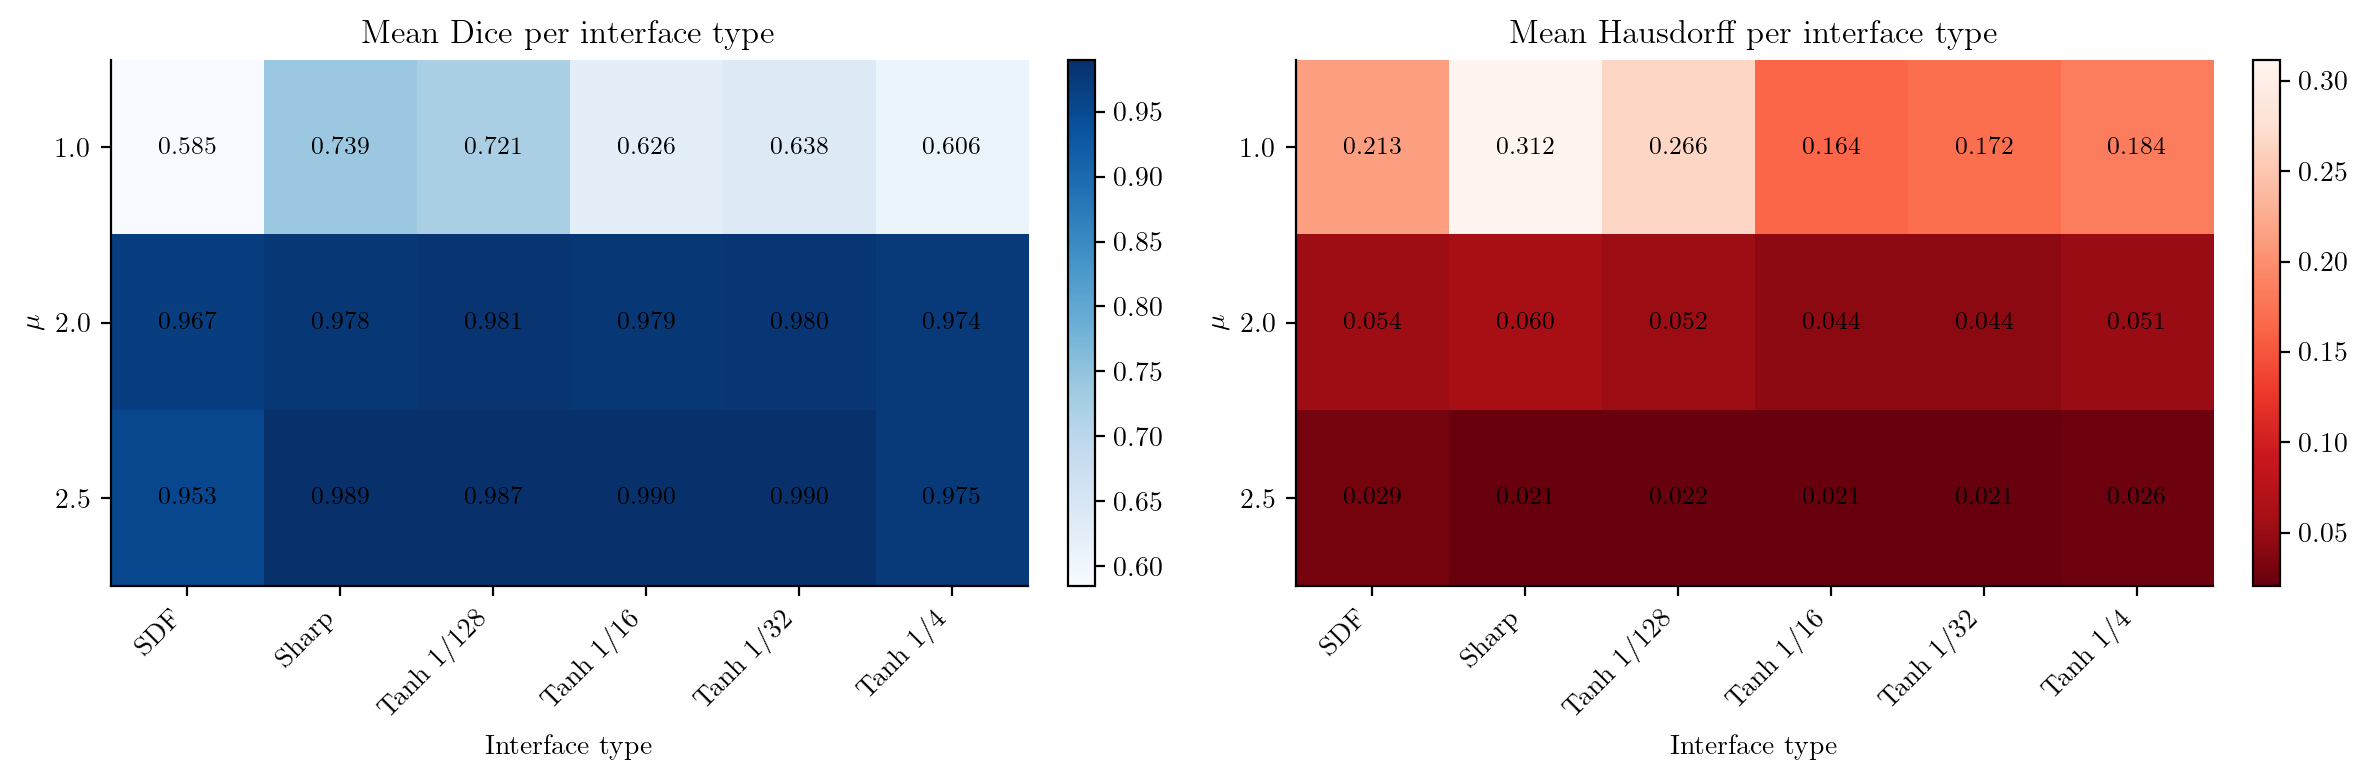

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from fractions import Fraction

def float_to_fraction(float_num):
    fraction = Fraction(float_num).limit_denominator()
    return f"{fraction.numerator}/{fraction.denominator}"

def label_from_row(row):
    interface_type = row['interface_type']
    epsilon = row['epsilon']
    if interface_type == InterfaceType.TANH_EPSILON.name:
        return f"Tanh {float_to_fraction(epsilon)}"
    elif interface_type == InterfaceType.SIGNED_DISTANCE_EXACT.name:
        return 'SDF'
    elif interface_type == InterfaceType.SIGNED_DISTANCE_APPROXIMATE.name:
        return 'SDF approx'
    elif interface_type == InterfaceType.HEAVISIDE.name:
        return 'Sharp'
    else:
        return 'Unknown'

def make_heatmap_table(df, value_column, drop_tanh_fractions = set(['1/64', '1/8']), hausdorff_normalise=False):
    working = df.copy()
    working['label'] = working.apply(label_from_row, axis=1)

    # Optionally normalise the Hausdorff values
    if hausdorff_normalise:
        working[value_column] = working[value_column]/64

    # Remove rows with any NaN in value_column
    working = working[~working[value_column].isna()]

    # Group and compute mean metric for each mu/label
    table = working.groupby(['mu', 'label'])[value_column].mean().unstack()

    # Remove columns containing specified tanh epsilons
    to_drop = []
    for col in table.columns:
        if col.startswith('Tanh'):
            frac = col.split()[-1]
            if frac in drop_tanh_fractions:
                to_drop.append(col)
    table = table.drop(columns=to_drop, errors='ignore')
    return table

def plot_metric_heatmap_matplotlib(data, ax, fmt=".3f", cmap="Blues", metric=""):
    # Prepare data and axes
    vals = data.values
    row_labels = [str(mu) for mu in data.index]
    col_labels = [str(c) for c in data.columns]

    # Show heatmap
    pcm = ax.imshow(vals, cmap=cmap, aspect='auto')

    # Annotate
    for i in range(vals.shape[0]):
        for j in range(vals.shape[1]):
            if not np.isnan(vals[i, j]):
                ax.text(j, i, format(vals[i, j], fmt),
                        ha="center", va="center", fontsize=9, color='black')

    # Configure ticks
    ax.set_xticks(np.arange(len(col_labels)))
    ax.set_xticklabels(col_labels, rotation=45, ha="right")
    ax.set_yticks(np.arange(len(row_labels)))
    ax.set_yticklabels(row_labels)
    ax.set_xlabel('Interface type')
    ax.set_ylabel(r'$\mu$')
    ax.set_title(f"Mean {metric} per interface type")

    # Aesthetics
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.grid(False)

    # Colorbar
    plt.colorbar(pcm, ax=ax, fraction=0.046, pad=0.04)

# Prepare tables
dice_table = make_heatmap_table(df, "dice")
hausdorff_table = make_heatmap_table(df, "hausdorff", hausdorff_normalise=True)

fig, axs = plt.subplots(1, 2, figsize=(12, 4), dpi=200)

plot_metric_heatmap_matplotlib(dice_table, ax=axs[0], fmt=".3f", cmap="Blues", metric="Dice")
plot_metric_heatmap_matplotlib(hausdorff_table, ax=axs[1], fmt=".3f", cmap="Reds_r", metric="Hausdorff")

plt.tight_layout()
plt.savefig('output/metrics_heatmap_matplotlib.pdf')
plt.show()



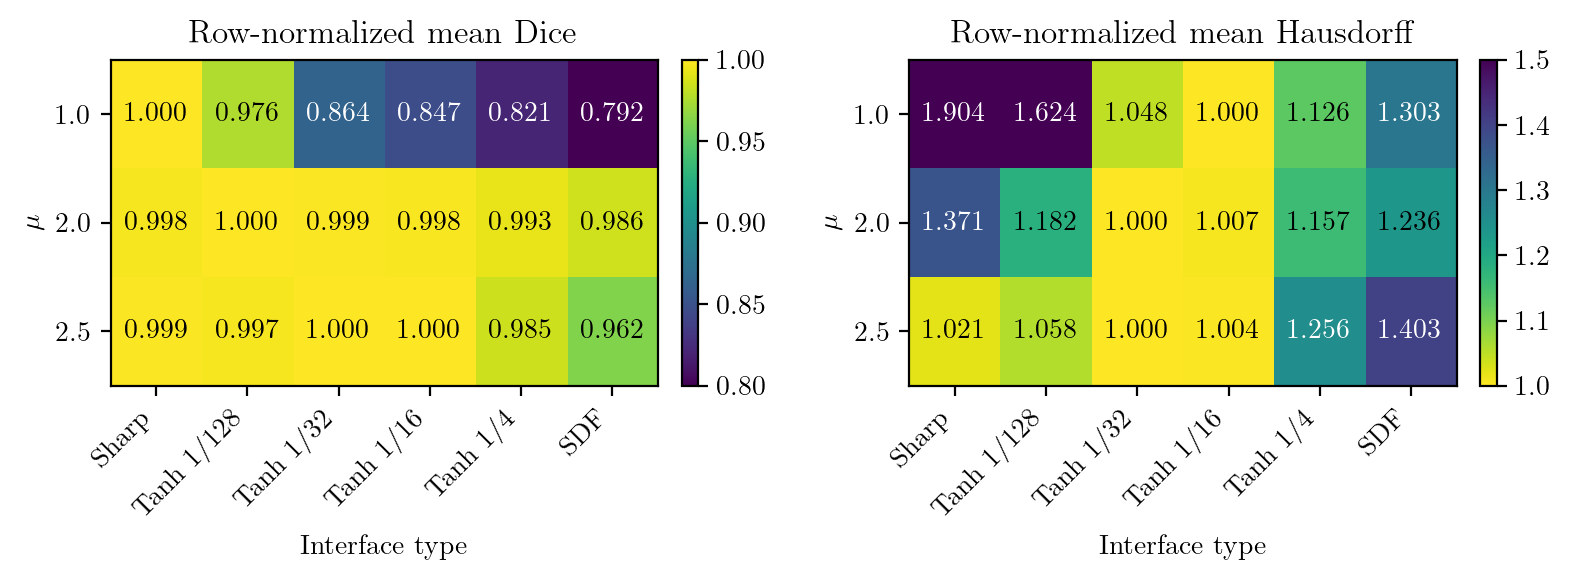

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from fractions import Fraction

def float_to_fraction(float_num):
    fraction = Fraction(float_num).limit_denominator()
    return f"{fraction.numerator}/{fraction.denominator}"

def label_from_row(row):
    interface_type = row['interface_type']
    epsilon = row['epsilon']
    if interface_type == InterfaceType.TANH_EPSILON.name:
        return f"Tanh {float_to_fraction(epsilon)}"
    elif interface_type == InterfaceType.SIGNED_DISTANCE_EXACT.name:
        return 'SDF'
    elif interface_type == InterfaceType.SIGNED_DISTANCE_APPROXIMATE.name:
        return 'SDF approx'
    elif interface_type == InterfaceType.HEAVISIDE.name:
        return 'Sharp'
    else:
        return 'Unknown'

def make_heatmap_table(
    df,
    value_column,
    drop_tanh_fractions = set(['1/64', '1/8']),
    hausdorff_normalise=False,
    desired_col_order=None
    ):
    working = df.copy()
    working['label'] = working.apply(label_from_row, axis=1)
    if hausdorff_normalise:
        working[value_column] = working[value_column]/64
    working = working[~working[value_column].isna()]
    table = working.groupby(['mu', 'label'])[value_column].mean().unstack()

    to_drop = []
    for col in table.columns:
        if col.startswith('Tanh'):
            frac = col.split()[-1]
            if frac in drop_tanh_fractions:
                to_drop.append(col)
    table = table.drop(columns=to_drop, errors='ignore')

    # Sort columns by desired order if provided
    if desired_col_order is not None:
        # Only take columns that are present
        table = table.reindex(columns=[c for c in desired_col_order if c in table.columns])

    return table

def normalize_rows_meanvalues(table, maximize=True):
    arr = table.to_numpy(dtype=float)
    arr_normed = np.empty_like(arr)
    for i, row in enumerate(arr):
        if maximize:
            best = np.nanmax(row)
            arr_normed[i, :] = row / best if best > 0 else row
        else:
            best = np.nanmin(row)
            arr_normed[i, :] = row / best if best > 0 else row
    return arr_normed

def plot_metric_heatmap_matplotlib(title, normed_data, row_labels, col_labels, ax, fmt=".2f", cmap="viridis", metric="", vmin=0, vmax=1):
    im = ax.imshow(normed_data, cmap=cmap, aspect='auto', vmin=vmin, vmax=vmax)

    # Annotate
    for i in range(normed_data.shape[0]):
        for j in range(normed_data.shape[1]):
            val = normed_data[i, j]
            if not np.isnan(val) and cmap == "viridis":
                color = 'white' if val < vmin + 0.5 * (vmax - vmin) else 'black'
                ax.text(j, i, format(val, fmt), ha="center", va="center", fontsize=10, color=color)
            elif not np.isnan(val) and cmap == "viridis_r":
                color = 'white' if val > vmin + 0.5 * (vmax - vmin) else 'black'
                ax.text(j, i, format(val, fmt), ha="center", va="center", fontsize=10, color=color)
            else:
                raise ValueError("Unexpected cmap")
    ax.set_xticks(np.arange(len(col_labels)))
    ax.set_xticklabels(col_labels, rotation=45, ha="right")
    ax.set_yticks(np.arange(len(row_labels)))
    ax.set_yticklabels(row_labels)
    ax.set_xlabel('Interface type')
    ax.set_ylabel(r'$\mu$')
    ax.set_title(title)

    #ax.spines['right'].set_visible(False)
    #ax.spines['top'].set_visible(False)
    ax.grid(False)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)


# Your preferred order:
desired_col_order = [
    "Sharp",
    "Tanh 1/128",
    "Tanh 1/32",
    "Tanh 1/16",
    "Tanh 1/4",
    "SDF",
]

dice_table = make_heatmap_table(
    df,
    "dice",
    desired_col_order=desired_col_order
)
hausdorff_table = make_heatmap_table(
    df,
    "hausdorff",
    hausdorff_normalise=True,
    desired_col_order=desired_col_order
)

# Row-normalize so that best in each row is 1.0
dice_normed = normalize_rows_meanvalues(dice_table, maximize=True)
hausdorff_normed = normalize_rows_meanvalues(hausdorff_table, maximize=False)

fig, axs = plt.subplots(1, 2, figsize=(8, 3), dpi=200)

# MANUALLY CONTROL COLORBAR RANGE HERE:
DICE_VMIN, DICE_VMAX = 0.8, 1.0        # As requested (best always 1)
HAUSDORFF_VMIN, HAUSDORFF_VMAX = 1.0, 1.5  # Example; edit as you wish

plot_metric_heatmap_matplotlib(
    title="Row-normalized mean Dice",
    normed_data=dice_normed,
    row_labels=[str(mu) for mu in dice_table.index],
    col_labels=[str(c) for c in dice_table.columns],
    ax=axs[0], fmt=".3f", cmap="viridis", metric="Dice", vmin=DICE_VMIN, vmax=DICE_VMAX
)
plot_metric_heatmap_matplotlib(
    title="Row-normalized mean Hausdorff",
    normed_data=hausdorff_normed,
    row_labels=[str(mu) for mu in hausdorff_table.index],
    col_labels=[str(c) for c in hausdorff_table.columns],
    ax=axs[1], fmt=".3f", cmap="viridis_r", metric="Hausdorff", vmin=HAUSDORFF_VMIN, vmax=HAUSDORFF_VMAX
)

plt.tight_layout()
plt.savefig('output/metrics_heatmap_matplotlib_rownorm_meanvalues_cbrange.pdf')
plt.show()

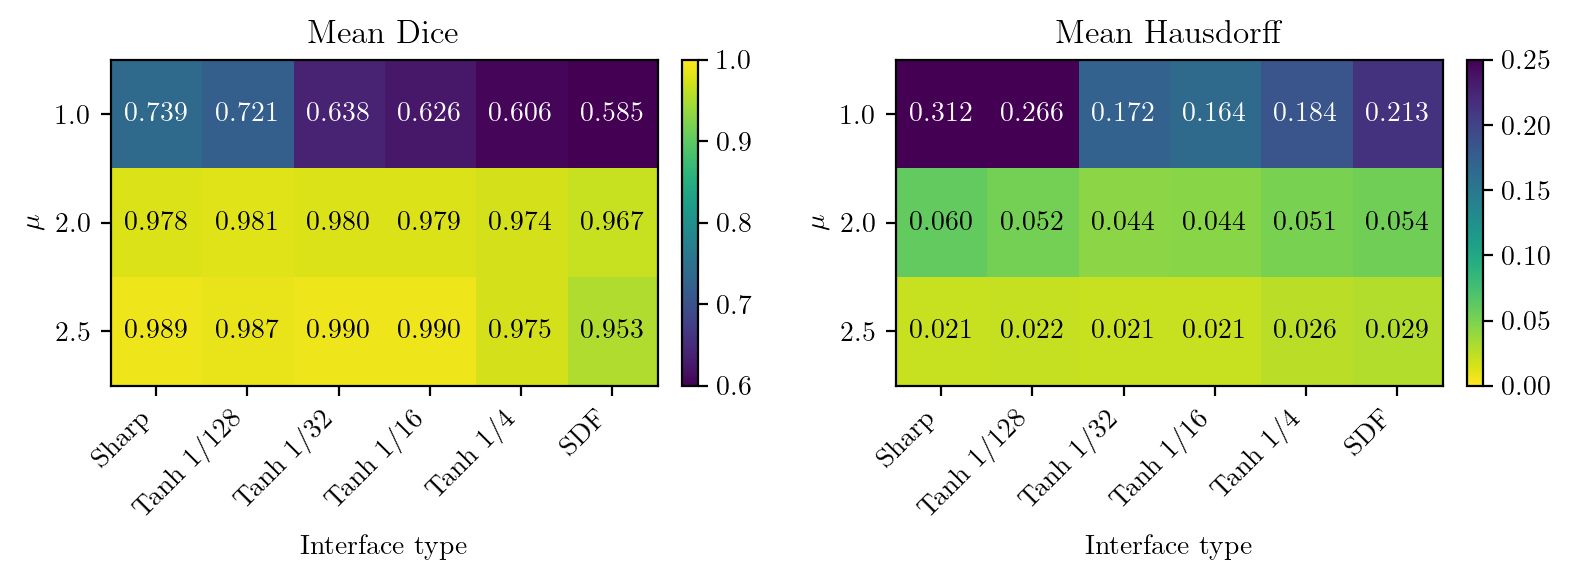

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from fractions import Fraction
import matplotlib
matplotlib.rc_file_defaults()

def float_to_fraction(float_num):
    fraction = Fraction(float_num).limit_denominator()
    return f"{fraction.numerator}/{fraction.denominator}"

def label_from_row(row):
    interface_type = row['interface_type']
    epsilon = row['epsilon']
    if interface_type == InterfaceType.TANH_EPSILON.name:
        return f"Tanh {float_to_fraction(epsilon)}"
    elif interface_type == InterfaceType.SIGNED_DISTANCE_EXACT.name:
        return 'SDF'
    elif interface_type == InterfaceType.SIGNED_DISTANCE_APPROXIMATE.name:
        return 'SDF approx'
    elif interface_type == InterfaceType.HEAVISIDE.name:
        return 'Sharp'
    else:
        return 'Unknown'

def make_heatmap_table(
        df,
        value_column,
        drop_tanh_fractions = set(['1/64', '1/8']),
        hausdorff_normalise=False,
        desired_col_order=None
):
    working = df.copy()
    working['label'] = working.apply(label_from_row, axis=1)
    if hausdorff_normalise:
        working[value_column] = working[value_column]/64
    working = working[~working[value_column].isna()]
    table = working.groupby(['mu', 'label'])[value_column].mean().unstack()

    to_drop = []
    for col in table.columns:
        if col.startswith('Tanh'):
            frac = col.split()[-1]
            if frac in drop_tanh_fractions:
                to_drop.append(col)
    table = table.drop(columns=to_drop, errors='ignore')

    # Sort columns by desired order if provided
    if desired_col_order is not None:
        # Only take columns that are present
        table = table.reindex(columns=[c for c in desired_col_order if c in table.columns])

    return table

def normalize_rows_meanvalues(table, maximize=True):
    arr = table.to_numpy(dtype=float)
    #arr_normed = np.empty_like(arr)
    #for i, row in enumerate(arr):
    #    if maximize:
    #        best = np.nanmax(row)
    #        arr_normed[i, :] = row / best if best > 0 else row
    #    else:
    #        best = np.nanmin(row)
    #        arr_normed[i, :] = row / best if best > 0 else row
    return arr

def plot_metric_heatmap_matplotlib(title, normed_data, row_labels, col_labels, ax, fmt=".2f", cmap="viridis", metric="", vmin=0, vmax=1):
    im = ax.imshow(normed_data, cmap=cmap, aspect='auto', vmin=vmin, vmax=vmax)

    # Annotate
    for i in range(normed_data.shape[0]):
        for j in range(normed_data.shape[1]):
            val = normed_data[i, j]
            if not np.isnan(val) and cmap == "viridis":
                color = 'white' if val < vmin + 0.5 * (vmax - vmin) else 'black'
                ax.text(j, i, format(val, fmt), ha="center", va="center", fontsize=10, color=color)
            elif not np.isnan(val) and cmap == "viridis_r":
                color = 'white' if val > vmin + 0.5 * (vmax - vmin) else 'black'
                ax.text(j, i, format(val, fmt), ha="center", va="center", fontsize=10, color=color)
            else:
                raise ValueError("Unexpected cmap")
    ax.set_xticks(np.arange(len(col_labels)))
    ax.set_xticklabels(col_labels, rotation=45, ha="right")
    ax.set_yticks(np.arange(len(row_labels)))
    ax.set_yticklabels(row_labels)
    ax.set_xlabel('Interface type')
    ax.set_ylabel(r'$\mu$')
    ax.set_title(title)

    #ax.spines['right'].set_visible(False)
    #ax.spines['top'].set_visible(False)
    ax.grid(False)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)


# Your preferred order:
desired_col_order = [
    "Sharp",
    "Tanh 1/128",
    "Tanh 1/32",
    "Tanh 1/16",
    "Tanh 1/4",
    "SDF",
]

dice_table = make_heatmap_table(
    df,
    "dice",
    desired_col_order=desired_col_order
)
hausdorff_table = make_heatmap_table(
    df,
    "hausdorff",
    hausdorff_normalise=True,
    desired_col_order=desired_col_order
)

# Row-normalize so that best in each row is 1.0
dice_normed = normalize_rows_meanvalues(dice_table, maximize=True)
hausdorff_normed = normalize_rows_meanvalues(hausdorff_table, maximize=False)

fig, axs = plt.subplots(1, 2, figsize=(8, 3), dpi=200)

# MANUALLY CONTROL COLORBAR RANGE HERE:
DICE_VMIN, DICE_VMAX = 0.6, 1        # As requested (best always 1)
HAUSDORFF_VMIN, HAUSDORFF_VMAX = 0.0, 0.25  # Example; edit as you wish

plot_metric_heatmap_matplotlib(
    title="Mean Dice",
    normed_data=dice_normed,
    row_labels=[str(mu) for mu in dice_table.index],
    col_labels=[str(c) for c in dice_table.columns],
    ax=axs[0], fmt=".3f", cmap="viridis", metric="Dice", vmin=DICE_VMIN, vmax=DICE_VMAX
)
plot_metric_heatmap_matplotlib(
    title="Mean Hausdorff",
    normed_data=hausdorff_normed,
    row_labels=[str(mu) for mu in hausdorff_table.index],
    col_labels=[str(c) for c in hausdorff_table.columns],
    ax=axs[1], fmt=".3f", cmap="viridis_r", metric="Hausdorff", vmin=HAUSDORFF_VMIN, vmax=HAUSDORFF_VMAX
)

plt.tight_layout()
plt.savefig('output/metrics_heatmap_matplotlib_meanvalues_cbrange.pdf')
plt.show()
